In [1]:
## check mean file ##

In [165]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import xarray as xr

In [179]:
plt.rcParams['font.size'] = 15
cm_balance = copy.copy(cm.balance)
cm_balance.set_bad('grey')

In [11]:
data = xr.open_dataset('/data/sallen/results/Reshapr/output/SalishSeaCast_hour_vvelocity_20150725_20150804.nc')

In [4]:
igrid = 386
j1, j2 = 210, 320

In [12]:
data.vomecrty

<xarray.DataArray 'vomecrty' (time: 264, depth: 40, gridY: 1, gridX: 110)>
[1161600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-07-25T00:30:00 ... 2015-08-04T23:30:00
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 386
  * gridX    (gridX) int64 210 211 212 213 214 215 ... 314 315 316 317 318 319
Attributes:
    units:          m s-1
    standard_name:  sea_water_y_velocity
    long_name:      Ocean Current Along y-Axis

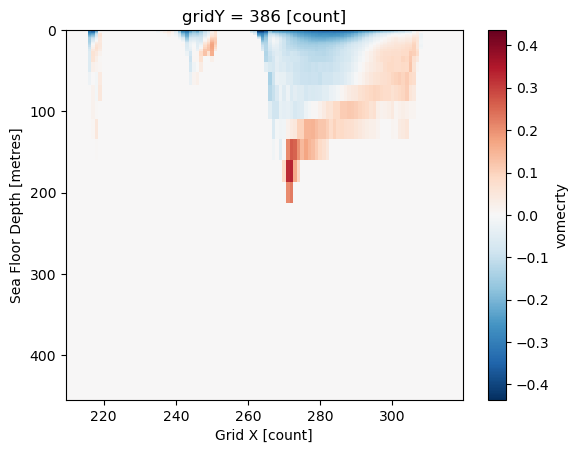

In [15]:
data.vomecrty[:].mean(axis=0).plot(yincrease=False);

In [16]:
data = xr.open_dataset('/data/sallen/results/Reshapr/output/SalishSeaCast_hour_vvelocity_20150601_20150901.nc')

In [17]:
data

<xarray.Dataset>
Dimensions:   (time: 4, depth: 40, gridY: 1, gridX: 110)
Coordinates:
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY     (gridY) int64 386
  * gridX     (gridX) int64 210 211 212 213 214 215 ... 314 315 316 317 318 319
  * time      (time) datetime64[ns] 2015-06-15 ... 2015-09-15
Data variables:
    vomecrty  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_hour_vvelocity_20150601_20150901
    description:  Hourly v velocity extracted from SalishSeaCast v202111
    history:      2024-07-03 14:15 -07:00: Generated by `reshapr extract /dat...
    Conventions:  CF-1.6

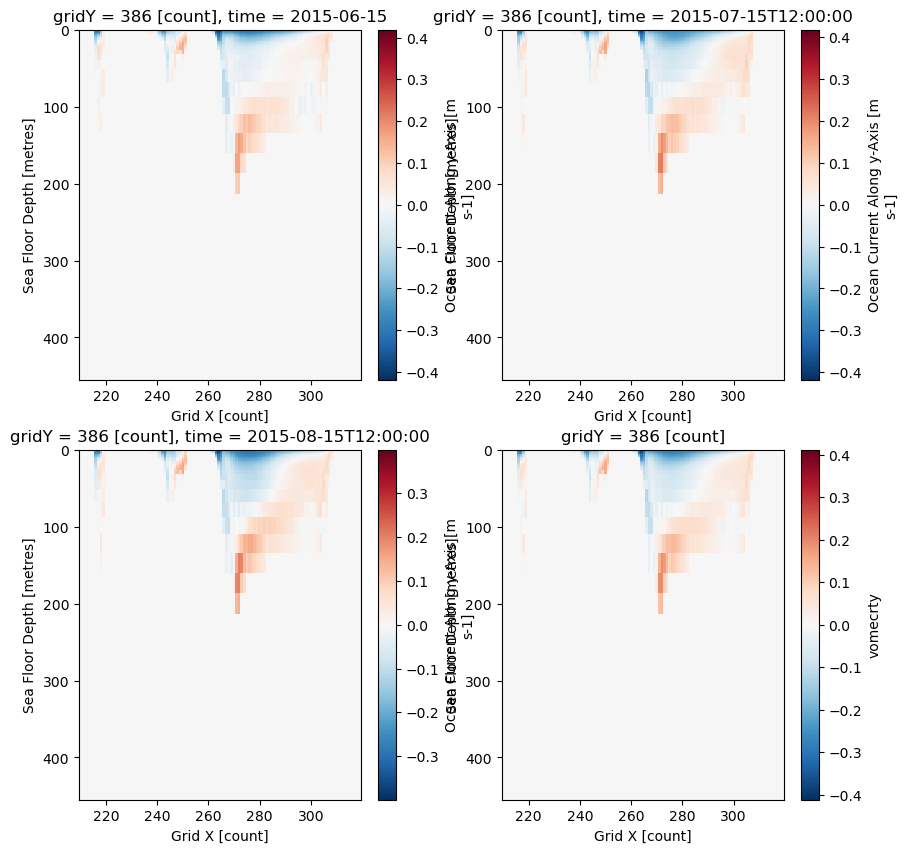

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
data.vomecrty[0].plot(ax=axs[0,0], yincrease=False);
data.vomecrty[1].plot(ax=axs[0,1], yincrease=False);
data.vomecrty[2].plot(ax=axs[1,0], yincrease=False);
data.vomecrty[0:3].mean(axis=0).plot(ax=axs[1,1], yincrease=False);

In [10]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
vmask = 1 - mesh.vmask[0]
e3v = mesh.e3v_0[0]
e1v = mesh.e1v[0]
mesh.close()

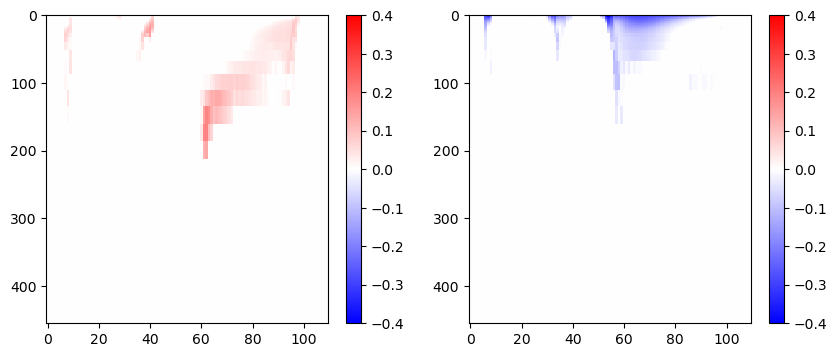

In [70]:
pos_values = np.array(data.vomecrty[0:3, :, 0].mean(axis=0))
neg_values = np.array(data.vomecrty[0:3, :, 0].mean(axis=0))
depth = np.array(data.depth)
pos_values[pos_values < 0] = 0
neg_values[neg_values > 0] = 0
xx, yy = np.meshgrid(depth, range(110))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
colours = axs[0].pcolormesh(range(110), depth, pos_values, cmap='bwr', vmax=0.4, vmin=-0.4, shading='nearest')
axs[0].invert_yaxis()
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(range(110), depth, neg_values, cmap='bwr', vmax=0.4, vmin=-0.4, shading='nearest')
axs[1].invert_yaxis()
fig.colorbar(colours, ax=axs[1]);

In [59]:
print ((pos_values * e3v[:, igrid, j1:j2] * e1v[igrid, j1:j2]).sum())

<xarray.DataArray ()>
array(80727.6382259)


In [60]:
print ((neg_values * e3v[:, igrid, j1:j2] * e1v[igrid, j1:j2]).sum())

<xarray.DataArray ()>
array(-90961.69763315)


In [52]:

data_2015 = xr.open_dataset('/data/sallen/results/Reshapr/output/SalishSeaCast_hour_vvelocity_20150101_20151231.nc')

data_2016 = xr.open_dataset('/data/sallen/results/Reshapr/output/SalishSeaCast_hour_vvelocity_20160101_20161231.nc')

data_2017 = xr.open_dataset('/data/sallen/results/Reshapr/output/SalishSeaCast_hour_vvelocity_20170101_20171231.nc')

data_2018 = xr.open_dataset('/data/sallen/results/Reshapr/output/SalishSeaCast_hour_vvelocity_20180101_20181231.nc')

data = xr.concat([data_2015, data_2016, data_2017, data_2018], dim='time')
data

<xarray.Dataset>
Dimensions:   (time: 48, depth: 40, gridY: 1, gridX: 110)
Coordinates:
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY     (gridY) int64 386
  * gridX     (gridX) int64 210 211 212 213 214 215 ... 314 315 316 317 318 319
  * time      (time) datetime64[ns] 2015-01-15T12:00:00 ... 2018-12-15T12:00:00
Data variables:
    vomecrty  (time, depth, gridY, gridX) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    name:         SalishSeaCast_hour_vvelocity_20150101_20151231
    description:  Hourly v velocity extracted from SalishSeaCast v202111
    history:      2024-07-03 16:05 -07:00: Generated by `reshapr extract /dat...
    Conventions:  CF-1.6

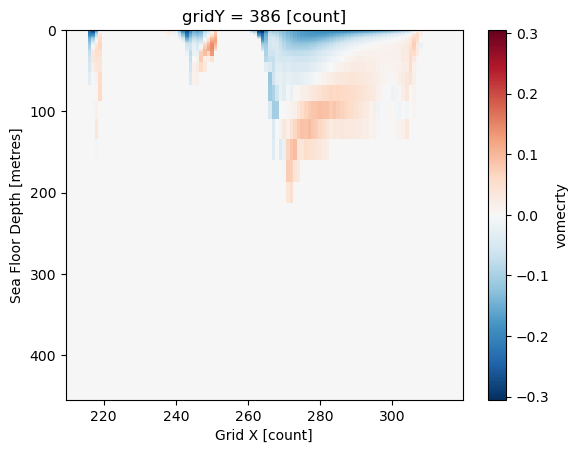

In [53]:
data_2015.vomecrty.mean(axis=0).plot(yincrease=False);

In [54]:
def process(data):
    pos_values = np.array(data.vomecrty[:, :, 0].mean(axis=0))
    neg_values = np.array(data.vomecrty[:, :, 0].mean(axis=0))
    depth = np.array(data.depth)
    pos_values[pos_values < 0] = 0
    neg_values[neg_values > 0] = 0

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    colours = axs[0].pcolormesh(range(110), depth, pos_values, cmap='bwr', vmax=0.4, vmin=-0.4, shading='nearest')
    axs[0].invert_yaxis()
    fig.colorbar(colours, ax=axs[0])
    colours = axs[1].pcolormesh(range(110), depth, neg_values, cmap='bwr', vmax=0.4, vmin=-0.4, shading='nearest')
    axs[1].invert_yaxis()
    fig.colorbar(colours, ax=axs[1]);

    print ('Positive Flux', (pos_values * e3v[:, igrid, j1:j2] * e1v[igrid, j1:j2]).sum())
    print ('Negative Flux', (neg_values * e3v[:, igrid, j1:j2] * e1v[igrid, j1:j2]).sum())
    return pos_values, neg_values

Positive Flux <xarray.DataArray ()>
array(62208.90137442)
Negative Flux <xarray.DataArray ()>
array(-70296.12312508)


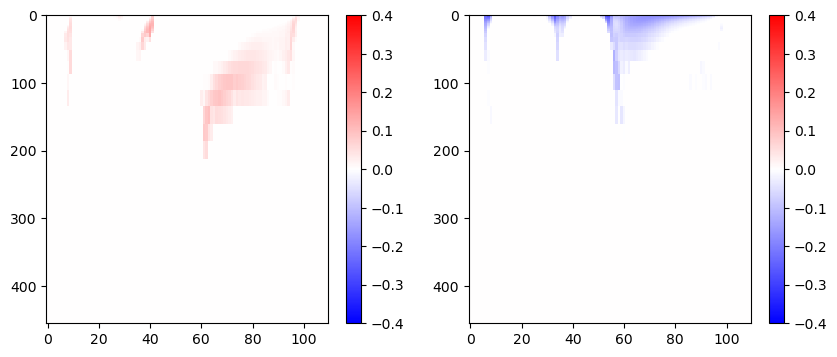

In [55]:
pos_values, neg_values = process(data)

In [68]:
def process_lateral_avg(data, cut):
    pos_values = np.array(data.vomecrty[:, :, 0, cut:].mean(axis=0))
    pos_values = (pos_values * e1v[igrid, j1+cut:j2].values 
                  * e3v[:, igrid, j1+cut:j2].values).sum(axis=1)
    print (pos_values.shape)
    neg_values = np.array(data.vomecrty[:, :, 0, cut:].mean(axis=0))
    neg_values = (neg_values * e1v[igrid, j1+cut:j2].values 
                  * e3v[:, igrid, j1+cut:j2].values).sum(axis=1)
    depth = np.array(data.depth)
    pos_values[pos_values < 0] = 0
    neg_values[neg_values > 0] = 0

    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    colours = ax.plot(depth, pos_values, c='tab:blue')
    colours = ax.plot(depth, neg_values, c='tab:red')

    print ('Positive Flux', pos_values.sum())
    print ('Negative Flux', neg_values.sum())

(40,)
Positive Flux 36649.558997214444
Negative Flux -41839.67339921515


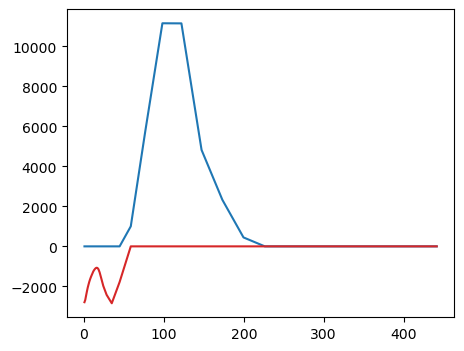

In [69]:
process_lateral_avg(data, cut=50)

(40,)
Positive Flux 37717.51127859701
Negative Flux -45804.73302926108


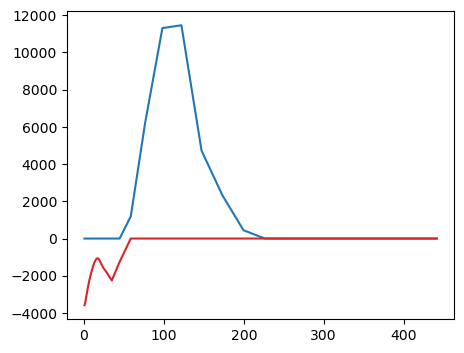

In [71]:
process_lateral_avg(data, cut=0)

In [47]:
data

<xarray.Dataset>
Dimensions:   (time: 24, depth: 40, gridY: 1, gridX: 110)
Coordinates:
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY     (gridY) int64 386
  * gridX     (gridX) int64 210 211 212 213 214 215 ... 314 315 316 317 318 319
  * time      (time) datetime64[ns] 2015-01-15T12:00:00 ... 2015-12-15T12:00:00
Data variables:
    vomecrty  (time, depth, gridY, gridX) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    name:         SalishSeaCast_hour_vvelocity_20150101_20151231
    description:  Hourly v velocity extracted from SalishSeaCast v202111
    history:      2024-07-03 16:05 -07:00: Generated by `reshapr extract /dat...
    Conventions:  CF-1.6

In [161]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')


vmask = mymesh.vmask[0, :, figrid]
u_lons = mymesh.glamv[0, figrid]    # note switch to v with the switch from t to f
#w_depths = mymesh.gdepw_1d
w_depths = mymesh.gdepw_0[0, :, igrid]
w_depths.shape

(40, 398)

/tmp/ipykernel_1372334/3745285282.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = ax.pcolormesh(np.array(u_lons[j1:j2]), np.array(w_depths[:, j1:j2]), plotfield, cmap=cm_balance,


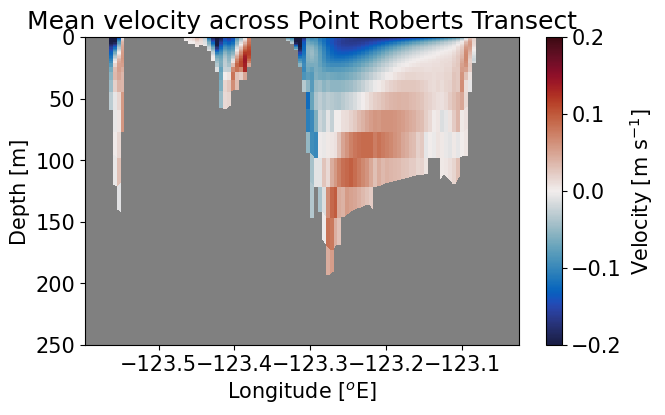

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
#data.vomecrty.mean(axis=0).plot(ax=ax, yincrease=False, cmap=cm.balance,);

plotfield = np.ma.array(data.vomecrty.mean(axis=0)[:,0], mask= 1-mymesh.vmask[0, :, igrid, j1:j2])

colours = ax.pcolormesh(np.array(u_lons[j1:j2]), np.array(w_depths[:, j1:j2]), plotfield, cmap=cm_balance, 
                            vmax = 0.2, vmin = -0.2)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity [m s$^{-1}$]')

#pc = draw_patches(fmask, j1, j2, np.array(u_lons), np.array(w_depths))
#ax.add_collection(pc)

ax.set_ylim(250, 0)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Longitude [$^o$E]')
ax.set_title("Mean velocity across Point Roberts Transect");

plt.savefig('meanvelocity.pdf')
plt.savefig('meanvelocity.png')